In [18]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('imdb.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [20]:
# Select relevant variables
df = data[["IMDB_Rating", "Released_Year", "Runtime",
           "Meta_score", "Gross", "Director"]]
df.head()

,IMDB_Rating,Released_Year,Runtime,Meta_score,Gross,Director
0,9.3,1994,142 min,80.0,"28,341,469",Frank Darabont
1,9.2,1972,175 min,100.0,"134,966,411",Francis Ford Coppola
2,9.0,2008,152 min,84.0,"534,858,444",Christopher Nolan
3,9.0,1974,202 min,90.0,"57,300,000",Francis Ford Coppola
4,9.0,1957,96 min,96.0,"4,360,000",Sidney Lumet


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDB_Rating    1000 non-null   float64
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   Meta_score     843 non-null    float64
 4   Gross          831 non-null    object 
 5   Director       1000 non-null   object 
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [22]:
df = df.copy()
# Convert 'Released_Year' to numeric, coercing errors to NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'],
                                    errors = "coerce")

In [23]:
# Check Row 966
df.iloc[966]

IMDB_Rating              7.6
Released_Year            NaN
Runtime              140 min
Meta_score              77.0
Gross            173,837,933
Director          Ron Howard
Name: 966, dtype: object

In [24]:
df["Decade"] = np.floor(df["Released_Year"] / 10) * 10

In [25]:
# Convert Runtime from string to integer by removing the " min" suffix
df['Runtime'] = df['Runtime'].str.replace(" min", "").astype(int)

In [26]:
# Fill NaN values in the Gross column with zero
df['Gross'] = df['Gross'].fillna(0)
print(df['Gross'].isna().sum())

0


In [27]:
# Convert and transform the Gross variable by removing commas, filling NaNs with 0, and converting to integer
df['Gross'] = df['Gross'].str.replace(",", "").fillna(0).astype(int)

In [28]:
# Create a new column for Gross in millions
df['Gross_mil'] = df['Gross'] / 1000000

In [29]:
# Drop the Released_Year and original Gross columns from the dataframe
df = df.drop(columns = ['Released_Year', 'Gross'])

# Final data
df.head()

,IMDB_Rating,Runtime,Meta_score,Director,Decade,Gross_mil
0,9.3,142,80.0,Frank Darabont,1990.0,28.341469
1,9.2,175,100.0,Francis Ford Coppola,1970.0,134.966411
2,9.0,152,84.0,Christopher Nolan,2000.0,534.858444
3,9.0,202,90.0,Francis Ford Coppola,1970.0,57.300000
4,9.0,96,96.0,Sidney Lumet,1950.0,4.360000


In [30]:
df.describe()

,IMDB_Rating,Runtime,Meta_score,Decade,Gross_mil
count,1000.000000,1000.000000,843.000000,999.000000,1000.000000
mean,7.949300,122.891000,77.971530,1986.586587,56.536878
std,0.275491,28.093671,12.376099,23.189130,103.238179
min,7.600000,45.000000,28.000000,1920.000000,0.000000
25%,7.700000,103.000000,70.000000,1970.000000,0.445710
50%,7.900000,119.000000,79.000000,1990.000000,10.702751
75%,8.100000,137.000000,87.000000,2000.000000,61.539891
max,9.300000,321.000000,100.000000,2020.000000,936.662225


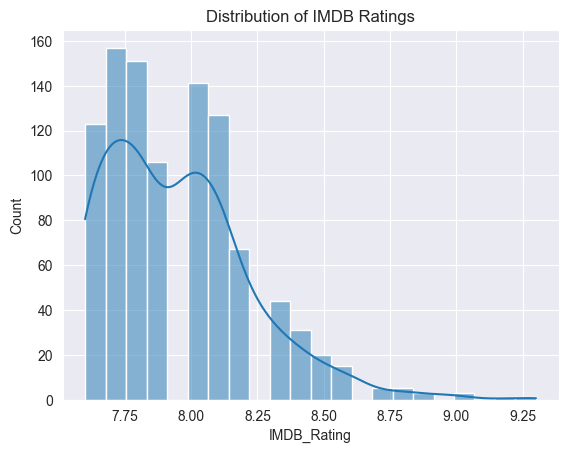

In [31]:
sns.histplot(df["IMDB_Rating"], kde = True)
plt.title("Distribution of IMDB Ratings")
plt.show()

In [32]:
# Compute the average IMDB rating for each director and sort in descending order
director_ratings = (df.groupby('Director')['IMDB_Rating']
                    .mean()
                    .sort_values(ascending = False).
                    head(10))

# Display the top 10 directors with the highest average IMDB rating
director_ratings

Director
Frank Darabont        8.95
Lana Wachowski        8.70
Irvin Kershner        8.70
Masaki Kobayashi      8.60
Fernando Meirelles    8.60
George Lucas          8.60
Sudha Kongara         8.60
Thomas Kail           8.60
Roberto Benigni       8.60
Milos Forman          8.50
Name: IMDB_Rating, dtype: float64

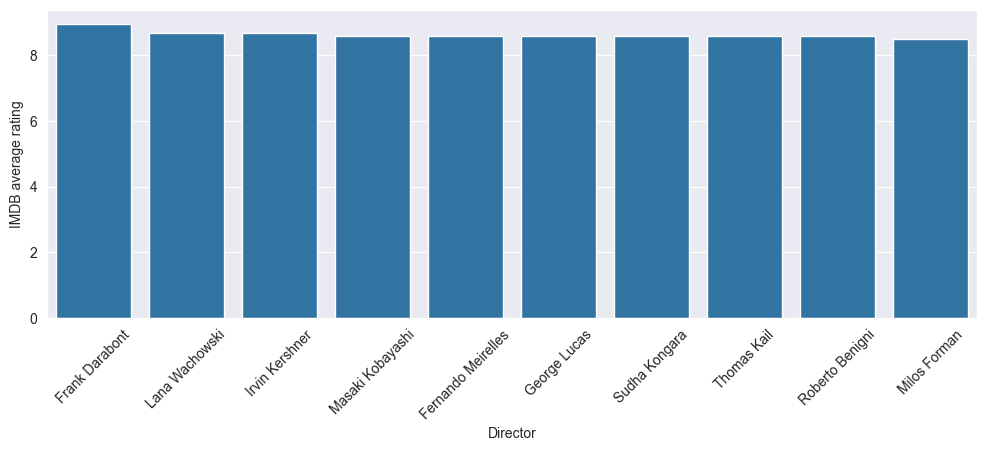

In [33]:
# Visualize the mean IMDB ratings for the top 10 directors using a bar plot
plt.figure(figsize = (12, 4))
sns.barplot(x = director_ratings.index,
            y = director_ratings.values)
plt.xticks(rotation = 45)
plt.xlabel('Director')
plt.ylabel('IMDB average rating')
plt.show()

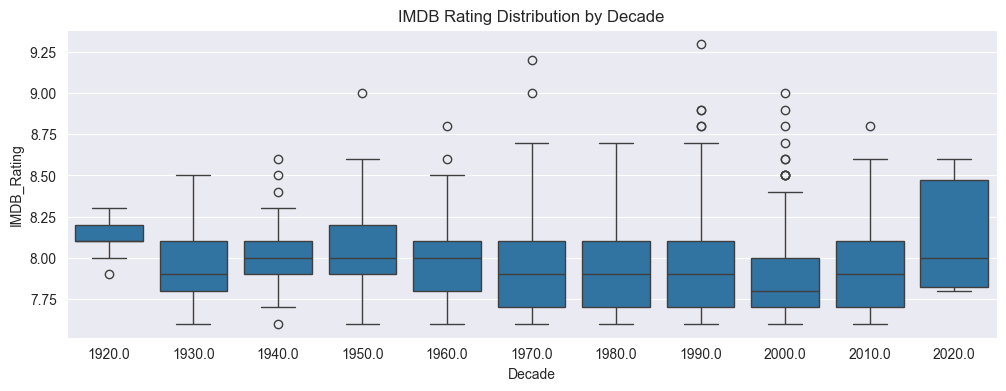

In [34]:
# Visualize the distribution of IMDB ratings by decade using a box plot
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'Decade',
            y = 'IMDB_Rating',
            data = df)
plt.title('IMDB Rating Distribution by Decade')
plt.show()

In [35]:
# Compute the covariance matrix for selected columns
df_co = df[['Runtime', 'IMDB_Rating', 'Gross_mil', 'Meta_score']]
df_co.cov()

,Runtime,IMDB_Rating,Gross_mil,Meta_score
Runtime,789.254373,1.881455,417.438934,-10.526302
IMDB_Rating,1.881455,0.075895,2.343023,0.942946
Gross_mil,417.438934,2.343023,10658.121703,-72.676259
Meta_score,-10.526302,0.942946,-72.676259,153.167835


In [36]:
df_co.corr()

,Runtime,IMDB_Rating,Gross_mil,Meta_score
Runtime,1.000000,0.243096,0.143928,-0.031452
IMDB_Rating,0.243096,1.000000,0.082381,0.268531
Gross_mil,0.143928,0.082381,1.000000,-0.053659
Meta_score,-0.031452,0.268531,-0.053659,1.000000


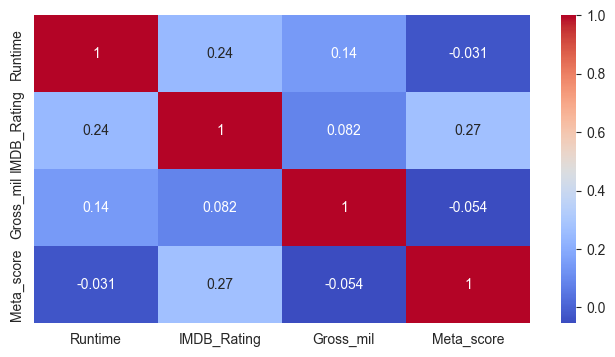

In [37]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize = (8,4))
sns.heatmap(df_co.corr(),
            annot = True,
            cmap = 'coolwarm')
plt.show()

In [39]:
# Calculate the Mean, the standard deviation, and the sample size
summary = df.groupby('Decade').agg({'Gross_mil': ['mean', 'std', 'count']})
summary.columns = ['Gross_mean' , 'Gross_std', 'Gross_count']

In [40]:
# Calculate the Standard Error of the Mean (SEM) for the Gross column
summary['Gross_sem'] = summary['Gross_std'] / np.sqrt(summary['Gross_count'])
summary.head()

,Gross_mean,Gross_std,Gross_count,Gross_sem
Decade,,,,
1920.0,1.341802,2.084388,11,0.628467
1930.0,9.968549,40.300467,24,8.226298
1940.0,4.739121,13.376285,35,2.261005
1950.0,7.846706,17.703398,56,2.365716
1960.0,21.234302,35.304236,73,4.132048


In [41]:
# Calculate the t-score for a 95% confidence level
alpha = 0.05
summary['tscore'] = st.t.ppf(1- alpha/2,
                             summary['Gross_count'] - 1)

# Calculate the lower and upper bounds of the 95% confidence interval for Gross
summary['lower_ci'] = summary['Gross_mean'] - summary['tscore'] * summary['Gross_sem']
summary['upper_ci'] = summary['Gross_mean'] + summary['tscore'] * summary['Gross_sem']

#Display outcome
summary

,Gross_mean,Gross_std,Gross_count,Gross_sem,tscore,lower_ci,upper_ci
Decade,,,,,,,
1920.0,1.341802,2.084388,11,0.628467,2.228139,-0.058509,2.742113
1930.0,9.968549,40.300467,24,8.226298,2.068658,-7.048845,26.985944
1940.0,4.739121,13.376285,35,2.261005,2.032245,0.144207,9.334036
1950.0,7.846706,17.703398,56,2.365716,2.004045,3.105705,12.587706
1960.0,21.234302,35.304236,73,4.132048,1.993464,12.997214,29.471390
1970.0,41.051211,61.715373,76,7.079239,1.992102,26.948645,55.153778
1980.0,56.013362,78.126921,89,8.281437,1.987290,39.555746,72.470978
1990.0,57.147999,92.390192,150,7.543628,1.976013,42.241692,72.054307
2000.0,63.191930,102.460660,237,6.655535,1.970067,50.080081,76.303779
